# Churn Analysis of Telco Customer database

### Life cycle of Machine learning Project 

<ul>
  <li>Understanding the problem statement</li>
  <li>Data collection</li>
  <li>Data checks to perform</li>
  <li>Exploratory data analysis</li>
  <li>Data Pre-processing</li>
  <li>Model trainning</li>
  <li>Choose the best model</li>
</ul>

## 1) Problem Statement


The main objectives of this work is to identify the factors influencing churn and create a model to predict churn.

## 2) Data Colection

### 2.1) Importing data and required packages

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

Read csv file

In [761]:
data_df = pd.read_csv("D:\Repositories\ml-churn/artifacts\data_ingestion\main_data.csv")

Printing the first 5 elements

In [175]:
data_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.2) Dataset information

<ul>
  <li>CustomerID: ID asigned to customers (ID)</li>
  <li>Gender: Whether a customer is a male or female (male / female)</li>
  <li>SeniorCitizen: Whether a customer is a senior citizen or not ( 1 / 0)</li>
  <li>Partner: Whether a customer has a partner or not (Yes / No)</li>
  <li>Dependendents: Whether a customer has dependents or not (Yes / No )</li>
  <li>Tenure: Number of months the customer has stayed with the company (Number)</li>
  <li>PhoneService: Whether a customer has a phone service or not (Yes / No)</li>
  <li>MultipleLines: Whether the customer has multiple lines (Yes / No / No phone service)</li>
  <li>InternetService: Category (DSL / Fiber optic / No)</li>
  <li>OnlineSecurity: Whether a customer has online security or not (Yes / No / No internet service)</li>
  <li>OnlineBackup: Whether a customer have online backup or not (Yes / No / No internet service)</li>
  <li>DeviceProtection: Whether a customer has device protection or not (Yes / No / No internet service)</li>
  <li>TechSupport: Whether a customer has support or not (Yes / No / No internet service)</li>
  <li>StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)</li>
  <li>StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)</li>
  <li>Contract: The contract term of the customer (Month-to-month, One year, Two year)</li>
  <li>PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)</li>
  <li>PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>
  <li>MonthlyCharges: The amount charged to the customer monthly</li>
  <li>TotalCharges: The total amount charged to the customer</li>
  <li>Churn: Whether the customer churned or not (Yes or No)</li>
</ul>

### 2.3) Data checks to perform

<ul>
  <li>Check missing values</li>
  <li>Check duplicates</li>
  <li>Check data types</li>
  <li>Check the number of uniques values in each column</li>
  <li>Check statistics of the data set</li>
</ul>

#### 2.31) Check missing values

In [176]:
data_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.32) Check Duplicates

In [177]:
data_df.duplicated().sum()

0

#### 2.33) Check data types

In [178]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Change data types of "SeniorCitizen" from int64 to object, and "TotalCharges" from object to float64

In [762]:
mapping_dict = {1: "Yes" , 0: "No"}
data_df["SeniorCitizen"] = data_df["SeniorCitizen"].map(mapping_dict)

In [763]:
data_df["TotalCharges"] = pd.to_numeric(data_df["TotalCharges"], errors='coerce')

Check again if some values of Total Charges were null or NaN

In [706]:
data_df.TotalCharges.isna().sum()

11

Imputing 0 values to NaN

In [764]:
data_df.dropna(inplace=True)

### 2.4) Exploring Data

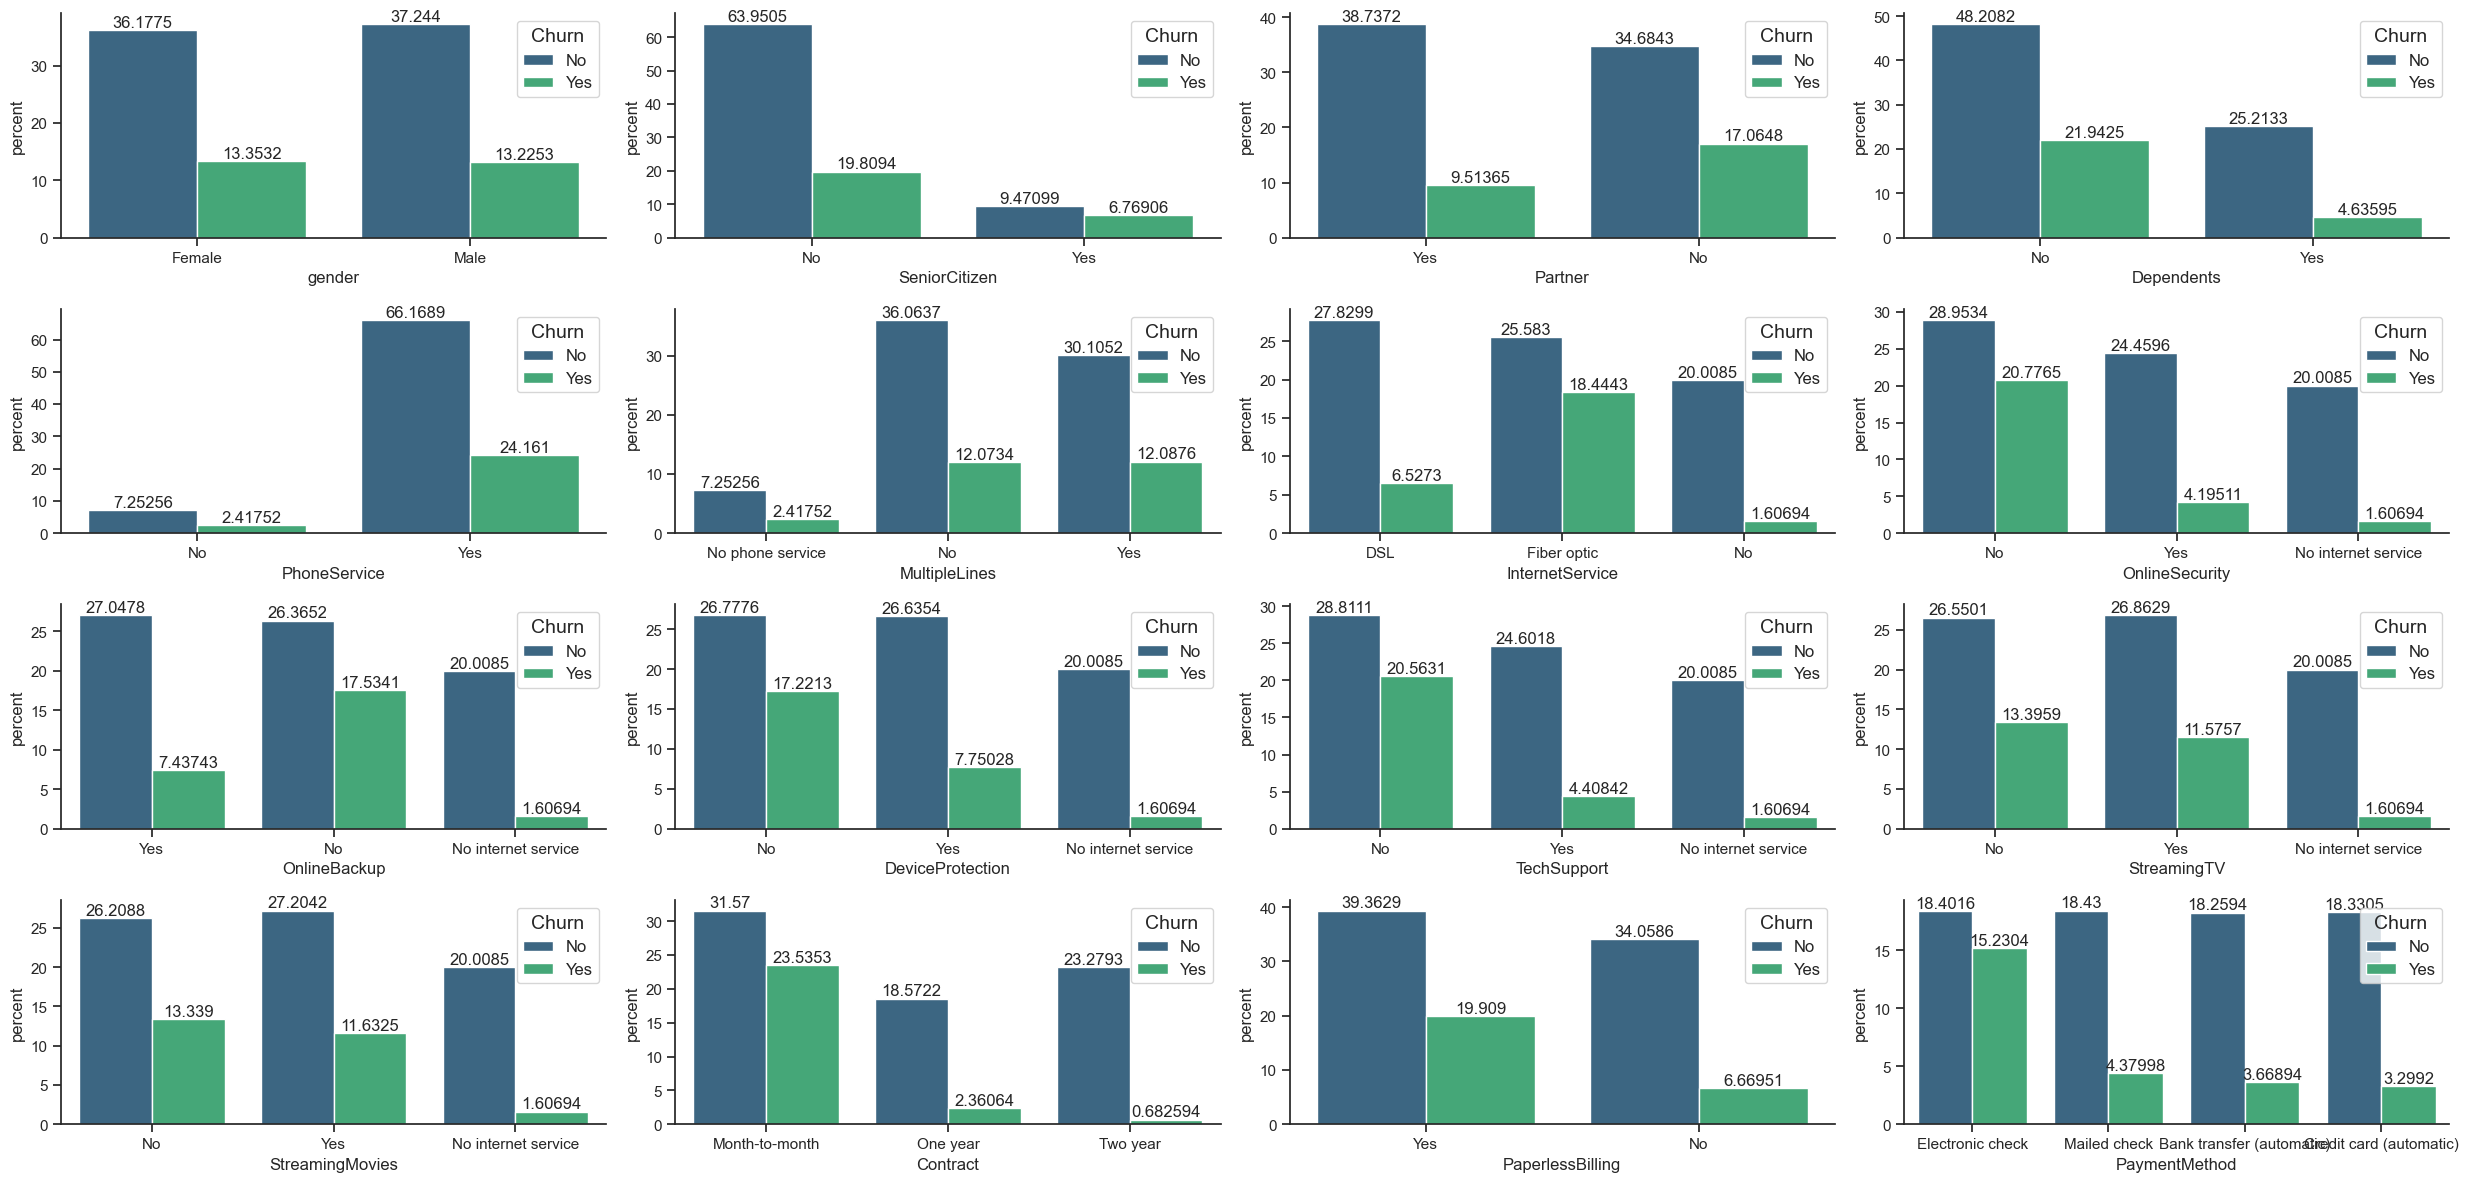

In [183]:
fig, ax = plt.subplots(4,4, figsize=(25,12))
axes = ax.ravel()

names = list(data_df.columns[[1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17]])

for name, axis in zip(names,axes):
    sns.countplot(x=data_df[name], hue=data_df["Churn"] , palette="viridis", ax=axis, stat="percent", edgecolor = 'Black')
    plt.setp(axis.get_legend().get_texts(), fontsize='12') # for legend text
    plt.setp(axis.get_legend().get_title(), fontsize='14') # for legend title

    for container in axis.containers:
        axis.bar_label(container)


plt.tight_layout()


In [669]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import shap
import joblib

In [527]:
input_data = data_df.drop(columns="Churn")

In [765]:
names = list(data_df.columns[[6,7,8,9,10,11,12,13,14,15,16,17]])

dd = data_df

for name in names: 
    dd = pd.get_dummies(dd, columns=[name], dtype=int)
dd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,No,Yes,No,1,29.85,29.85,No,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,Male,No,No,No,34,56.95,1889.50,No,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,Male,No,No,No,2,53.85,108.15,Yes,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,Male,No,No,No,45,42.30,1840.75,No,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,Female,No,No,No,2,70.70,151.65,Yes,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,84.80,1990.50,No,0,...,1,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,Female,No,Yes,Yes,72,103.20,7362.90,No,0,...,1,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,29.60,346.45,No,1,...,0,1,0,0,0,1,0,0,1,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,74.40,306.60,Yes,0,...,0,1,0,0,0,1,0,0,0,1


In [766]:
dd.drop(columns="customerID", inplace=True)
dd.drop(columns= "InternetService_No", inplace= True)
dd.drop(columns= "OnlineSecurity_No internet service", inplace= True)
dd.drop(columns= "OnlineBackup_No internet service", inplace= True)
dd.drop(columns= "DeviceProtection_No internet service", inplace= True)
dd.drop(columns= "TechSupport_No internet service", inplace= True)
dd.drop(columns= "StreamingTV_No internet service", inplace= True)
dd.drop(columns= "StreamingMovies_No internet service", inplace= True)


In [767]:
Ord_encoder = LabelEncoder()
Std_encoder = StandardScaler()
One_henconder= OneHotEncoder()

Ordinal_variables = ["gender", "SeniorCitizen","Partner","Dependents","Churn"]
Numeric_variables = ["tenure","MonthlyCharges","TotalCharges"]
One_hot_variables = ["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

def label_encoder_transformer(variables):
    encoded_variable = variables.apply(lambda col: Ord_encoder.fit_transform(col))
    return encoded_variable


# preprocessor = ColumnTransformer(transformers=[
#                                 ("Ordinal", FunctionTransformer(label_encoder_transformer, validate=False), Ordinal_variables),
#                                 ("Standar", Std_encoder, Numeric_variables),
#                                 ("Onehot", One_henconder, One_hot_variables)
#                                 ])
# dd = preprocessor.fit_transform(dd)

dd[Ordinal_variables] = dd[Ordinal_variables].apply(lambda col: Ord_encoder.fit_transform(col))
dd[Numeric_variables] = Std_encoder.fit_transform(dd[Numeric_variables])


In [768]:
kmeans = KMeans(n_clusters=4)
gmm    = GaussianMixture(n_components=3)
kmeans.fit(dd.drop(columns="Churn"))
gmm.fit(dd.drop(columns="Churn"))

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


GaussianMixture(n_components=3)

In [769]:
silhouette_avg = silhouette_score(dd.drop(columns="Churn"), kmeans.labels_)
silhouette_avg2= silhouette_score(dd.drop(columns="Churn"), gmm.predict(dd.drop(columns="Churn")))
print(silhouette_avg,silhouette_avg2)

0.19680245700096852 0.18219888522089786


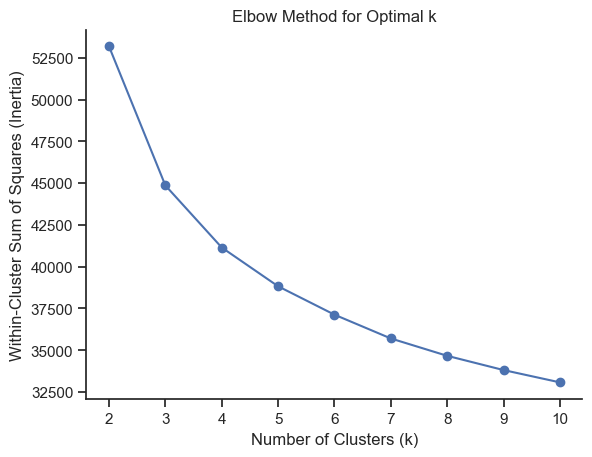

In [770]:
inertias = []
possible_k_values = range(2, 11)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=2)
    kmeans.fit(dd.drop(columns="Churn"))
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

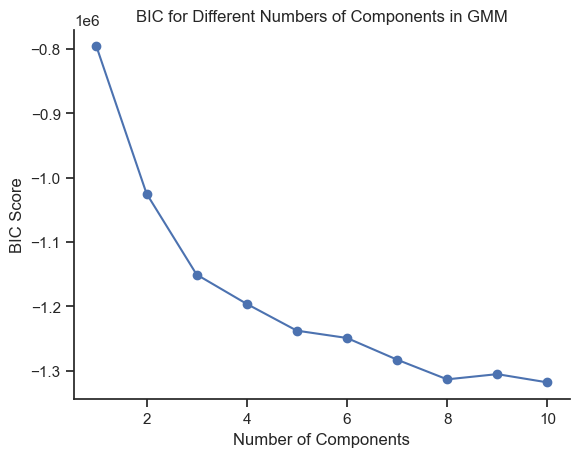

In [721]:
n_components_range = range(1, 11)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(dd.drop(columns="Churn"))
    bic_scores.append(gmm.bic(dd.drop(columns="Churn")))

# Plot the BIC scores
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC for Different Numbers of Components in GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

In [772]:
X_train, X_test, y_train, y_test = train_test_split(dd.drop(columns="Churn"), dd["Churn"], test_size=0.3, random_state=42, stratify=dd["Churn"])


param_grid = {
    'n_estimators': [290],
    'eta': [0.015],
    'max_depth' : [4],
    'alpha':[0.06],
    'lambda': [0.03],
    'eval_metric':["aucpr"],
    'subsample':[1],
    'colsample_bytree':[0.9],
    'gamma':[5]
}



# Create a Gaussian Mixture model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

In [773]:
(y_test == 1).sum()/y_test.count()

0.26587677725118486

In [774]:
(y_train == 1).sum()/y_train.count()

0.2657456318569687

In [775]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.06], 'colsample_bytree': [0.9],
                         'eta': [0.015], 'eval_metric': ['aucpr'], 'gamma': [5],
                         'lambda': [0.03], 'max_depth': [4],
                         'n_estimators': [290], 'subsample': [1]},
             scoring='roc_auc')

Confusion Matrix:
[[1404  145]
 [ 281  280]]


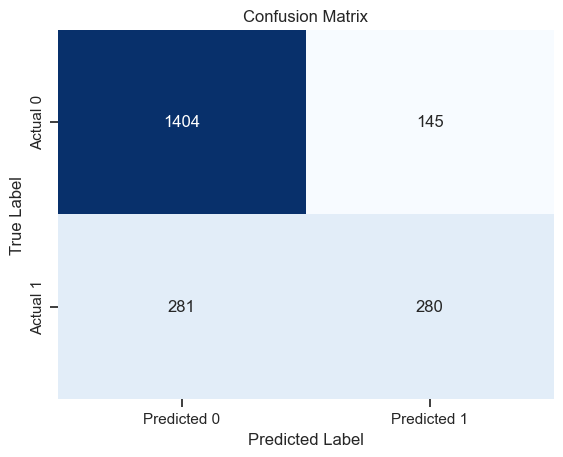

In [776]:
y_pred = grid_search.best_estimator_.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [777]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_colsample_bytree,param_eta,param_eval_metric,param_gamma,param_lambda,...,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.344738,0.011497,0.025527,0.002853,0.06,0.9,0.015,aucpr,5,0.03,...,1,"{'alpha': 0.06, 'colsample_bytree': 0.9, 'eta'...",0.833972,0.853803,0.874418,0.845328,0.83593,0.84869,0.014689,1


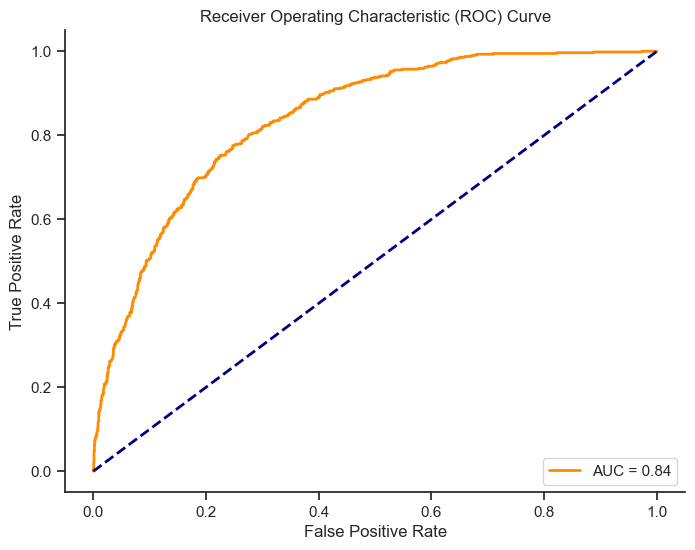

In [778]:
best_model = grid_search.best_estimator_

# Predict probabilities on the test set
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [779]:

def calculate_metrics(conf_matrix):
    """
    Calculate various performance metrics from a confusion matrix.

    Parameters:
    - conf_matrix: 2x2 NumPy array, confusion matrix with rows representing actual classes
                  and columns representing predicted classes.

    Returns:
    - metrics_dict: Dictionary containing calculated performance metrics.
    """
    TP = conf_matrix[1, 1]  # True Positives
    TN = conf_matrix[0, 0]  # True Negatives
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fpr = FP / (FP + TN)
    fdr = FP / (TP + FP)
    fnr = FN / (TP + FN)
    mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Create a dictionary to store the metrics
    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1_score,
        'False Positive Rate (FPR)': fpr,
        'False Discovery Rate (FDR)': fdr,
        'False Negative Rate (FNR)': fnr,
        'Matthews Correlation Coefficient (MCC)': mcc,
    }

    return metrics_dict


In [780]:
calculate_metrics(conf_matrix)

{'Accuracy': 0.7981042654028436,
 'Precision': 0.6588235294117647,
 'Recall': 0.49910873440285203,
 'Specificity': 0.9063912201420271,
 'F1 Score': 0.5679513184584177,
 'False Positive Rate (FPR)': 0.09360877985797289,
 'False Discovery Rate (FDR)': 0.3411764705882353,
 'False Negative Rate (FNR)': 0.5008912655971479,
 'Matthews Correlation Coefficient (MCC)': 0.4466872246588416}

In [632]:
X100 = shap.utils.sample(dd.drop(columns="Churn"), 100)
explainer = shap.Explainer(grid_search.best_estimator_.predict, X100)
shap_values = explainer(dd.drop(columns="Churn"))


PermutationExplainer explainer: 7033it [25:26,  4.58it/s]                          


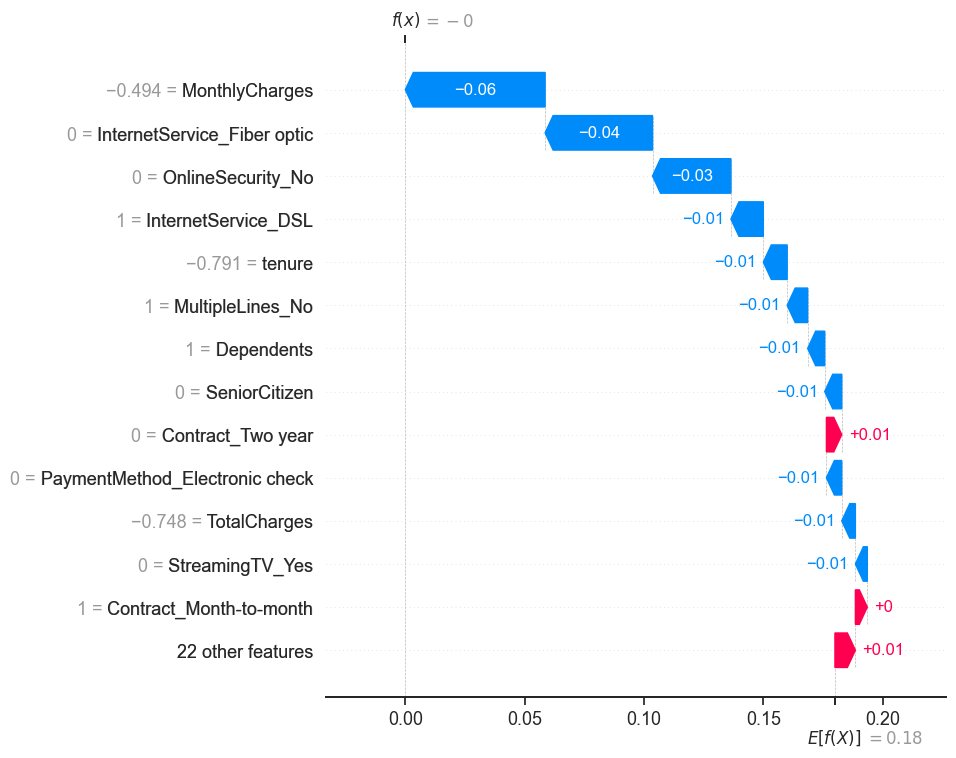

In [635]:
shap.plots.waterfall(shap_values[10], max_display=14)


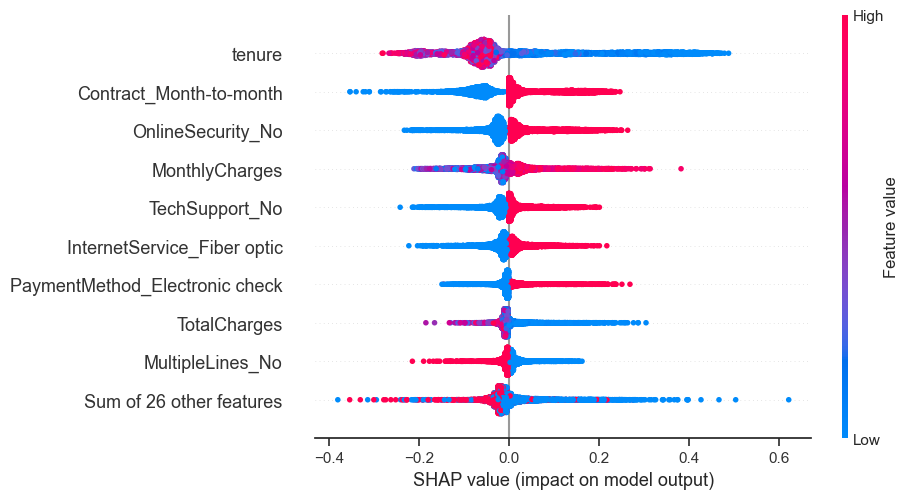

In [636]:
shap.plots.beeswarm(shap_values)


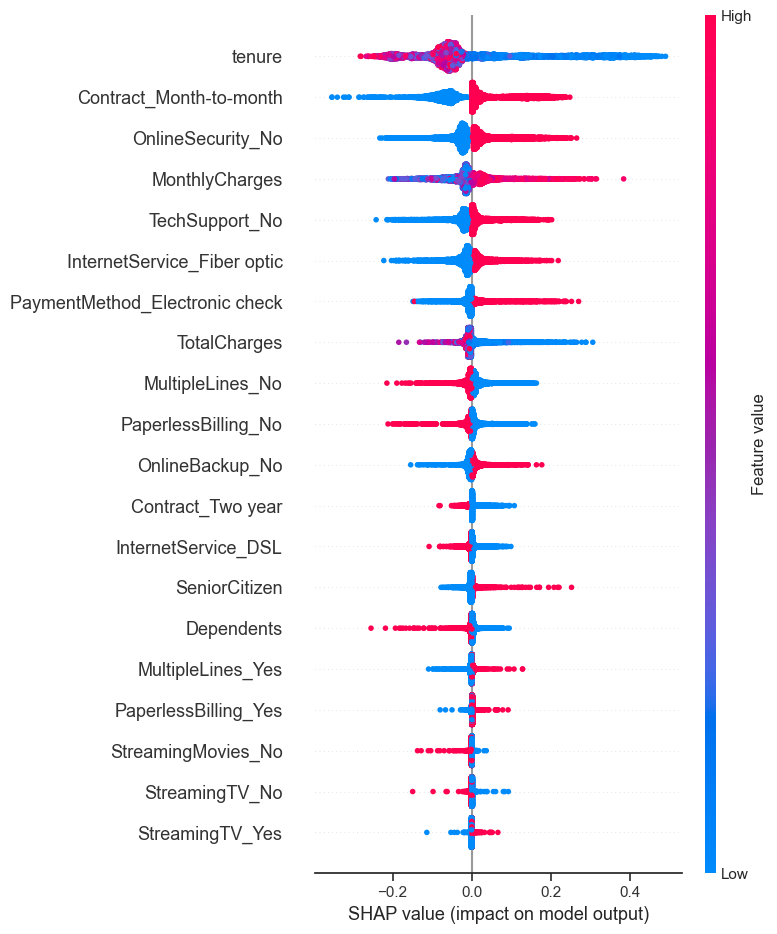

In [641]:
shap.summary_plot(shap_values)
